> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project I going to investgate TMDb movie data set that contains information about 10,000 movies collected from The Movie Database (TMDb). It has 21 columns including user ratings and revenue.

### Questions for Analysis
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?


In [1]:
# import packages needed for analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load the data and print out a few lines.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.duplicated().sum()

1

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
df.drop(['id', 'budget', 'revenue', 'imdb_id', 'homepage', 'tagline', 'production_companies', 'overview', 'keywords', 'director'], axis=1, inplace=True)
df.head()

,popularity,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Drop the unwanted columns that are not going to be useful in answering any of the questions

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Drop duplicated rows sothat we have unique entries to analyze

In [11]:
df.replace(0, np.NaN, inplace=True)

From describe function I noticed that there are columns have zero values which is not acceptable such as movie with "runtime" equals zero. so I replaced zero values to NaN values as preparation step to drop them

In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
runtime           3850 non-null float64
genres            3850 non-null object
release_date      3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 360.9+ KB


In [13]:
df.isnull().sum().sum() #Check it works correct

0

#### put columns elements in proper data types

In [14]:
df.budget_adj = df.budget_adj.astype(np.int64)
df.revenue_adj = df.revenue_adj.astype(np.int64)

Here I changed the type of budget and revenue into intger values as it would be easier to deal with them as they are very big numbers

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## Which genres are most popular from year to year?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2429ded198>,
      dtype=object)

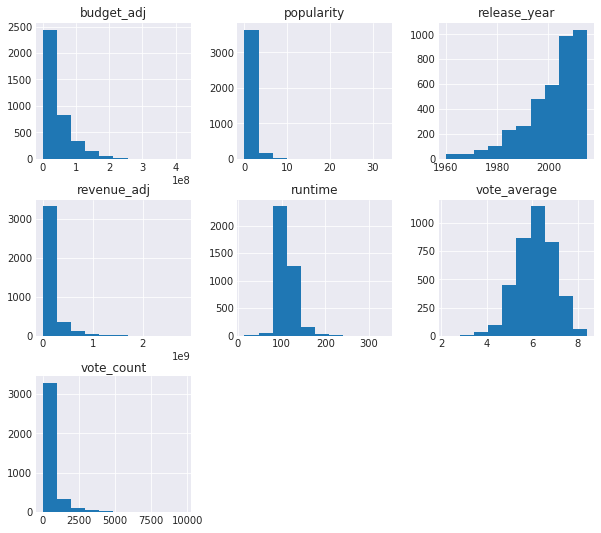

In [15]:
df.hist(figsize=(10, 9))

A quick observation of this histogram plot we will see that 
- the most common movie run time is between 100 and 200
- the most common rate is around 6 or 7


In [19]:
genres = df['genres'].str.cat(sep = '|')

So we want to know the most popular genre around the given years so I start by concatenate all genres together to count them in the next step

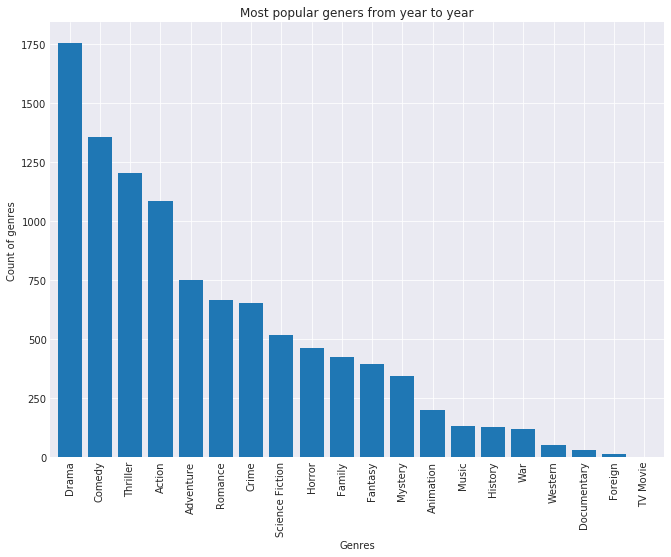

In [20]:
pd.Series(genres.split('|')).value_counts().plot(kind='bar', width=0.8, figsize=(11, 8))
plt.title('Most popular geners from year to year')
plt.xlabel('Genres')
plt.ylabel('Count of genres');

After counting the genres I plot them using bar plot type and we can notice that the "Drama" genre is the most popular of all genres

## What kinds of properties are associated with movies that have high revenues?

In [21]:
mean_rev = df.revenue_adj.mean()
mean_rev

137198567.32103896

We will consider The movie revenues above the mean revenue as high revenue

In [22]:
df1 = df[df['revenue_adj'] > mean_rev]
df1.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03,1.120000e+03
mean,2.129715,116.553571,1195.613393,6.431875,1999.778571,8.222410e+07,3.673382e+08
std,2.210622,22.404255,1293.406735,0.718921,12.434676,5.510256e+07,2.872929e+08
min,0.131526,69.000000,13.000000,4.100000,1960.000000,2.240000e+02,1.375112e+08
25%,1.011166,100.000000,332.000000,5.900000,1994.000000,3.914732e+07,1.860528e+08
50%,1.580763,114.000000,725.500000,6.400000,2003.000000,7.270485e+07,2.680396e+08
75%,2.521477,129.000000,1592.750000,7.000000,2010.000000,1.139663e+08,4.371547e+08
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [35]:
df1.budget_adj.median()

72704853.0

In [23]:
df1.shape

(1120, 11)

Here I mapped the movies in terms of the high revenue to see the properties of them

#### From the properties I noticed that the lowest revenue was at 1960 and the highest was at 2015 so it would be interesting if we plot year against the revenue to see the relation between them

Text(0,0.5,'Revenue')

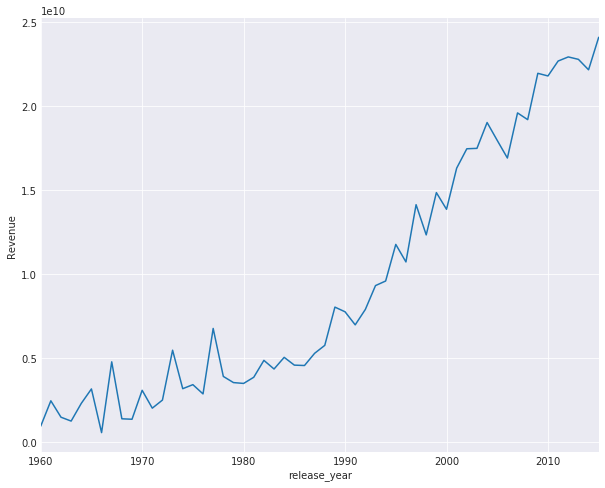

In [24]:
df.groupby('release_year')['revenue_adj'].sum().plot( figsize=(10, 8))
plt.ylabel('Revenue')

As we see from the line plot the revenue increasing by the year

#### Also it would be good if we see the runtime distribution to see if it has an effect on the revenue

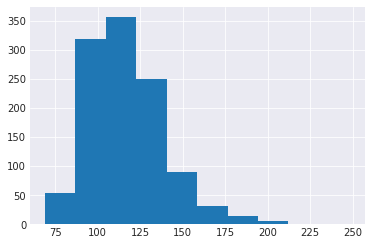

In [26]:
df1.runtime.hist()

As we see most high revenue movie runtime is around 100 and 125

#### It is good for production companies to know the most frequent actors contributing in high revenue movies 

In [28]:
actors = df1['cast'].str.cat(sep = '|') # as I did above. concatenate all actors to count them

Text(0,0.5,'Count of movies')

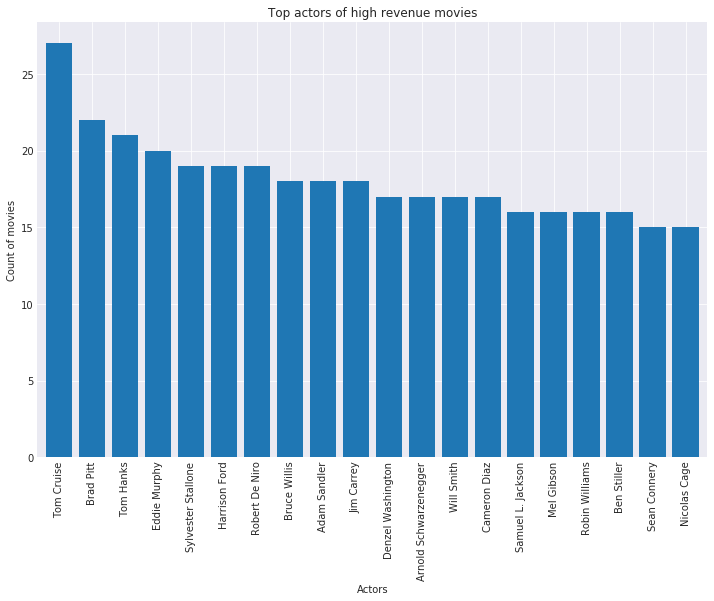

In [29]:
pd.Series(actors.split('|')).value_counts().head(20).plot(kind='bar', width=0.8, figsize=(12, 8))
plt.title('Top actors of high revenue movies')
plt.xlabel('Actors')
plt.ylabel('Count of movies')

This plot of 20 most participating actors and show that Tom cruise is the most participating actor in high revenue movies

<a id='conclusions'></a>
## Conclusions

After this interesting investigation and analysis I can say to have a high revenue movie 
- the genre of the movie should be around Drama, Science Fiction, Action, Comedy and Thriller
- the runtime of the film should be about 120
- the budget on average should be around 70 million $
- the cast should have from these actors "Tom Cruise, Brad Pitt, Tom Hanks, Eddie Murphy"
- the curve of revenue is rising with years maybe due to new technology so production companies can spend money and they will get more

### Limitations
> The analysis is done on small data set about 3500 movie after data cleaning so This might not be completely error free.


In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0